<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.2.2: Regularisation

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

# Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

# Load Diabetics Data Using datasets of sklearn

In [2]:
## Load the Diabetes dataset
diabetes_csv = '..\\DATA\\diabetes.csv'
diabetes=pd.read_csv(diabetes_csv)
# Load the diabetes dataset from sklearn
diabetes_sk=datasets.load_diabetes(as_frame=True)

In [3]:
# Description
diabetes_sk=pd.DataFrame(diabetes_sk['data'])

In [4]:
diabetes_sk.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204


In [5]:

diabetes_sk.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [6]:
diabetes_sk.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [ ]:
age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol
s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level

In [7]:
diabetes_sk.rename(columns={'s1':'total serum cholesterol',
                       's2':'low-density lipoproteins',
                       's3':'high-density lipoproteins',
                       's4':'total cholesterol / HDL',
                       's5':'possibly log of serum triglycerides level',
                       's6':'blood sugar level'},inplace=True)

In [8]:
diabetes_sk.head()

,age,sex,bmi,bp,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level,blood sugar level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


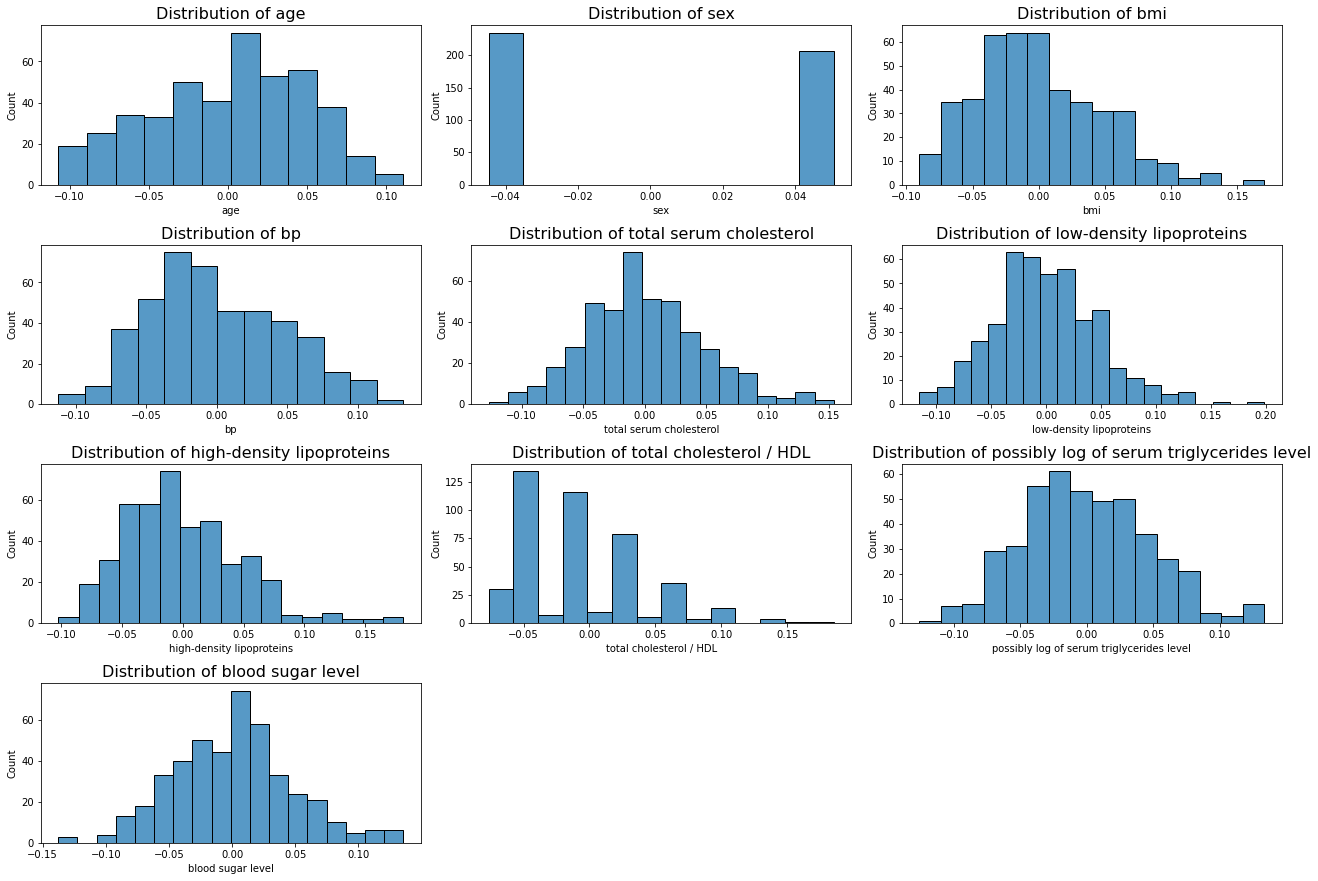

In [10]:
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in diabetes_sk.columns:
    plt.subplot(6,3,num)
    sns.histplot(data=diabetes_sk, x=cols) #hue='red_wine' add into can split the red wine values 1/0 to see difference
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [12]:
# Predictors
X= diabetes_sk[[cols for cols in diabetes_sk.columns if cols != 'blood sugar level']]

In [13]:
X

,age,sex,bmi,bp,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528


In [14]:
# Target
y = diabetes_sk['blood sugar level']

In [17]:
y

0     -0.017646
1     -0.092204
2     -0.025930
3     -0.009362
4     -0.046641
         ...   
437    0.007207
438    0.044485
439    0.015491
440   -0.025930
441    0.003064
Name: blood sugar level, Length: 442, dtype: float64

## Create a Base Model Using Linear Regression

In [19]:
# Create Model
model=LinearRegression()

In [20]:

#rename X and Y
X_diabetes = diabetes_sk[[cols for cols in diabetes_sk.columns if cols != 'blood sugar level']]
y_diabetes = diabetes_sk['blood sugar level']


In [53]:
X_diabetes

,age,sex,bmi,bp,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528


In [21]:
# Fit
model.fit(X_diabetes,y_diabetes)
model.intercept_,model.coef_

(-1.596268976132746e-16,
 array([ 0.11921674,  0.06715709,  0.15204223,  0.15622151, -0.07554103,
         0.08227142,  0.08514922,  0.1732423 ,  0.23266615]))

In [22]:
# Score
model.score(X_diabetes,y_diabetes)

0.3264281383306422

In [23]:
# Check Coefficient
model.coef_

array([ 0.11921674,  0.06715709,  0.15204223,  0.15622151, -0.07554103,
        0.08227142,  0.08514922,  0.1732423 ,  0.23266615])

In [24]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

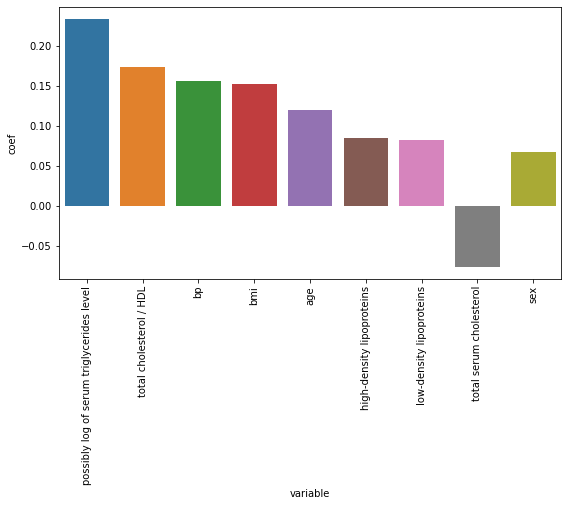

In [27]:
# Plot Coefficients
plt.figure(figsize = (9,5))
plt.xticks(rotation=90)
view_coeff(X_diabetes, model)

## Calculate Ridge Regression model

In [28]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

### Visual Representation of Coefficient of Ridge Model

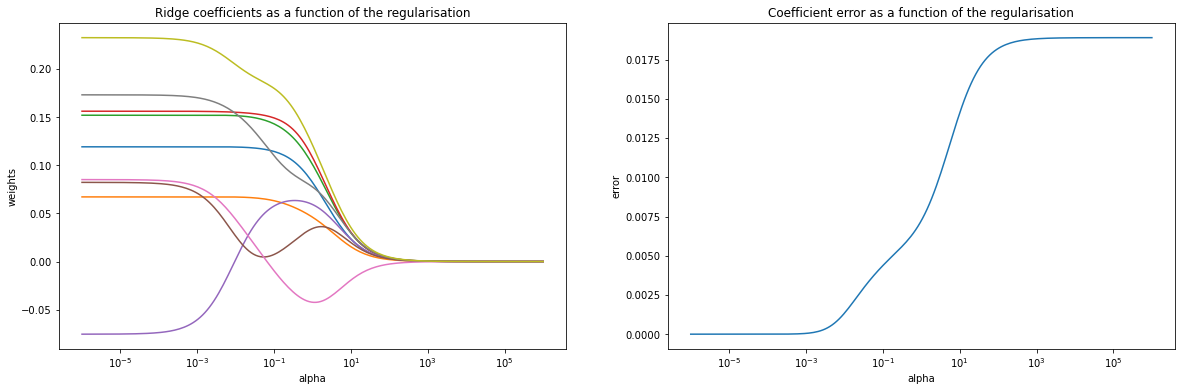

In [29]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

### [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [31]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_diabetes,y_diabetes)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_diabetes,y_diabetes))

Alpha: 0.2673841615839944
Score: 0.32245568661112045


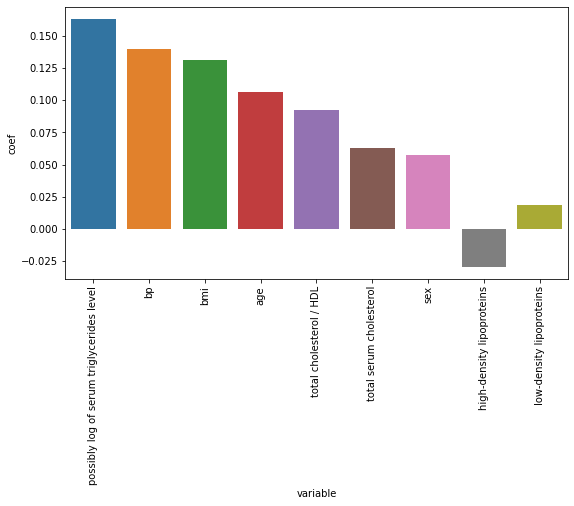

In [33]:
plt.figure(figsize = (9,5))
plt.xticks(rotation=90)
view_coeff(X_diabetes, optimal_ridge)

## Calculate Lasso Regression model

In [34]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasso = Lasso()
# keep track of the intermediate results for coefficients and errors
coefs_lasso = []
errors_lasso = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)
# Train the model with different regularisation strengths
for a in lasso_alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_diabetes, y_diabetes)
    coefs_lasso.append(lasso.coef_)
    errors_lasso.append(mean_squared_error(lasso.coef_, model.coef_))

### Visual Represenantion of Coefficient of Lasso Model

Hint: Same as Ridge

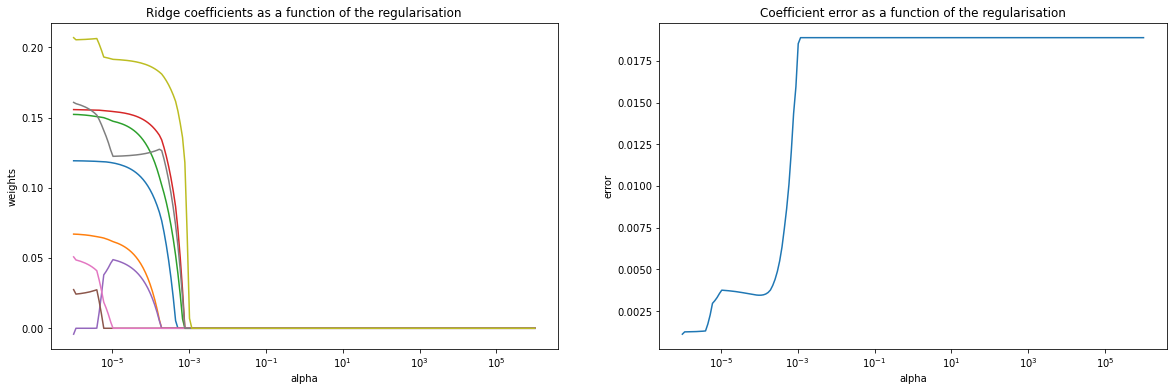

In [35]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

### [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [47]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_diabetes, y_diabetes))

Alpha: 2.4374441501222216e-05
Score: 0.32561080046974666


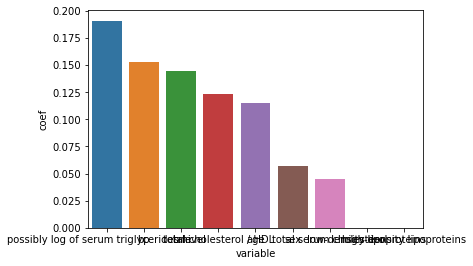

In [38]:
# Plot Coefficient
view_coeff(X_diabetes, optimal_lasso)

## [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create scatterplot for both Ridge and Lasso residuals.

In [49]:
# Build the ridge and lasso using optimal alpha
ridge=RidgeCV(alphas=optimal_ridge.alphas)
lasso=LassoCV(alphas=optimal_lasso.alphas)
# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge.fit(X_diabetes,y_diabetes)
lasso.fit(X_diabetes,y_diabetes)

LassoCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]))

In [46]:
optimal_ridge.alpha

AttributeError: 'RidgeCV' object has no attribute 'alpha'

In [50]:
# model residuals:
ridge_resid = y - ridge.predict(X)
lasso_resid = y - lasso.predict(X)

C:\Users\YC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


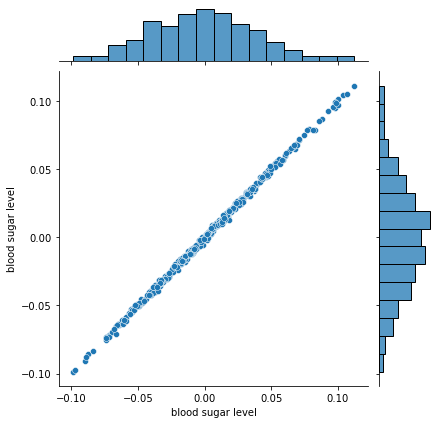

In [52]:
# Jointplot
sns.jointplot(ridge_resid,lasso_resid)